# Region Perturbation

In this notebook, the following perturbation objectives should be demonstrated:

- Most Relevant First
- Least Relevant First
- Random

Perturbation mode used is inpainting.



## LRP

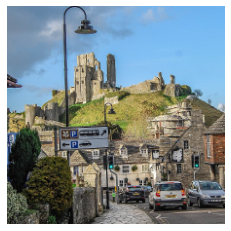

Finished 'relevance' in 0.4338 secs


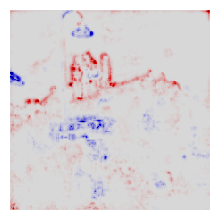

In [1]:
%load_ext autoreload
%autoreload 2

from typing import Callable, Dict, List, Tuple, Union

import numpy
import torch
import torchvision
from matplotlib import pyplot as plt

import lrp.plot
import lrp.rules as rules
from lrp import image
from lrp.core import LRP
from lrp.filter import LayerFilter
from lrp.rules import LrpEpsilonRule, LrpGammaRule, LrpZBoxRule, LrpZeroRule
from lrp.zennit.types import AvgPool, Linear

# Input data
# Image is in RGB mode with range [0,1]
img_bgr_hwc_float_0_1: numpy.array = image.load_img_norm_zero_one('../../../data/castle.jpg')
X = lrp.norm.ImageNetNorm.transform(img_bgr_hwc_float_0_1)
# Simulate batch by adding a new dimension
X = torch.unsqueeze(X, 0)

plt.axis('off')
lrp.plot.plot_imagenet(X)

# Model
model = torchvision.models.vgg16(pretrained=True)
model.eval()

# Low and high parameters for zB-rule
batch_size: int = 1
shape: Tuple[int] = (batch_size, 3, 224, 224)

low: torch.Tensor = lrp.norm.ImageNetNorm.normalize(torch.zeros(*shape))
high: torch.Tensor = lrp.norm.ImageNetNorm.normalize(torch.ones(*shape))

# Init layer filter
vgg16_target_types: Tuple[type] = (Linear, AvgPool)
filter_by_layer_index_type: LayerFilter = LayerFilter(model)
filter_by_layer_index_type.set_target_types(vgg16_target_types)

name_map: List[Tuple[List[str], rules.LrpRule, Dict[str, Union[torch.Tensor, float]]]]
name_map = [
    (filter_by_layer_index_type(lambda n: n == 0), LrpZBoxRule, {'low': low, 'high': high}),
    (filter_by_layer_index_type(lambda n: 1 <= n <= 16), LrpGammaRule, {'gamma': 0.25}),
    (filter_by_layer_index_type(lambda n: 17 <= n <= 30), LrpEpsilonRule, {'epsilon': 0.25}),
    (filter_by_layer_index_type(lambda n: 31 <= n), LrpZeroRule, {}),
]

lrp_instance: LRP = LRP(model)
lrp_instance.convert_layers(name_map)
R: torch.Tensor = lrp_instance.relevance(X)
lrp_instance.heatmap(R, width=2, height=2)

## Region Perturbation

### Random

Finished '_flip' in 0.1962 secs
Finished '_flip' in 0.1504 secs
Finished '_flip' in 0.1619 secs
Finished '_flip' in 0.1486 secs
Finished '_flip' in 0.1518 secs
Finished '_flip' in 0.1431 secs
Finished '_flip' in 0.1444 secs
Finished '_flip' in 0.1465 secs
Finished '_flip' in 0.1534 secs
Finished '_flip' in 0.1520 secs
Finished '_flip' in 0.1580 secs
Finished '_flip' in 0.1516 secs
Finished '_flip' in 0.1578 secs
Finished '_flip' in 0.1639 secs
Finished '_flip' in 0.1848 secs
Finished '_flip' in 0.1666 secs
Finished '_flip' in 0.1720 secs
Finished '_flip' in 0.1664 secs
Finished '_flip' in 0.1725 secs
Finished '_flip' in 0.1752 secs
Finished '_flip' in 0.1783 secs
Finished '_flip' in 0.1711 secs
Finished '_flip' in 0.1723 secs
Finished '_flip' in 0.1714 secs
Finished '_flip' in 0.1699 secs
Finished '_flip' in 0.1680 secs
Finished '_flip' in 0.1747 secs
Finished '_flip' in 0.1466 secs
Finished '_flip' in 0.1449 secs
Finished '__call__' in 5.0392 secs
Finished 'calculate_auc_score' in 0.0

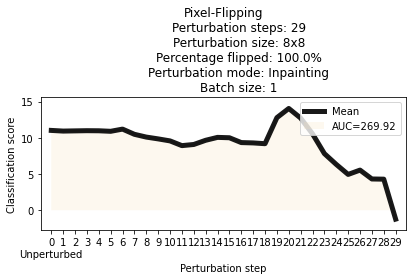

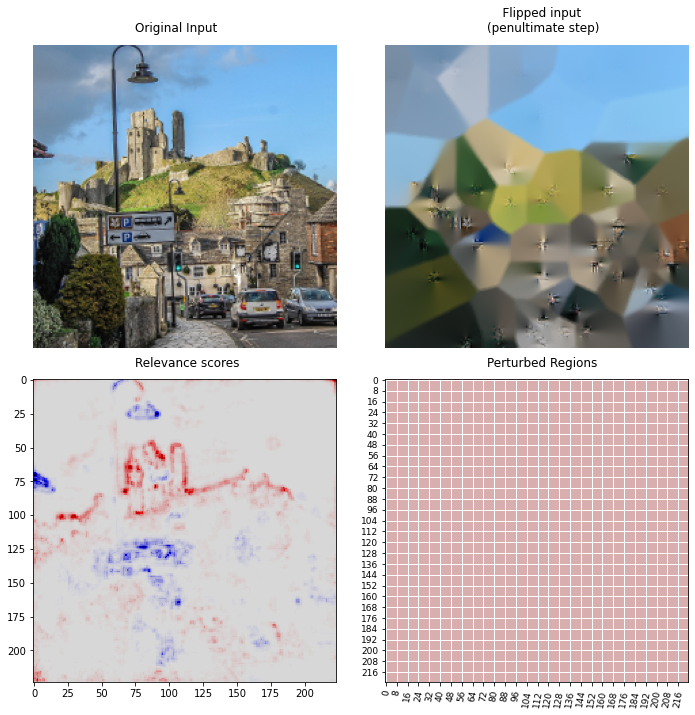

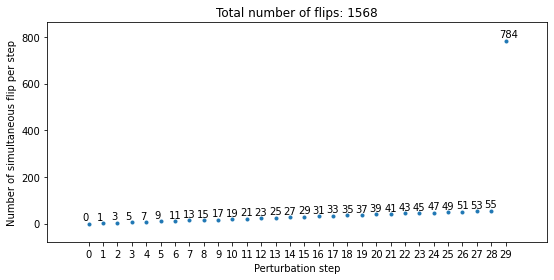

In [2]:
# %%script false --no-raise-error

from pf.core import PixelFlipping
from pf.objectives.constants import PixelFlippingObjectives
# Parameters for cell: input_nchw, relevance_scores_nchw, lrp_instance
from pf.perturbation_modes.constants import PerturbModes

perturbation_steps: int = 29
perturbation_size: int = 8

pixel_flipping_instance: PixelFlipping = PixelFlipping(perturbation_steps=perturbation_steps,
                                              perturbation_size=perturbation_size,
                                              perturb_mode=PerturbModes.INPAINTING,
                                              objective=PixelFlippingObjectives.RANDOM)
input_nchw: torch.Tensor = X.clone().detach()

# Enable reproducibility
torch.manual_seed(42)

relevance_scores_nchw: torch.Tensor = R.clone().detach()

# Function should return the (single-class) classification score for the given input to measure the difference between flips.
forward_pass: Callable[[torch.Tensor], float] = lambda input_nchw: lrp_instance.model(input_nchw)[:,483]

# Run Pixel-Flipping algorithm
pixel_flipping_instance(input_nchw, relevance_scores_nchw, forward_pass)
pixel_flipping_instance.plot_class_prediction_scores()
pixel_flipping_instance.plot_image_comparison()
pixel_flipping_instance.plot_number_of_flips_per_step()

### Most Relevant First

Finished '_flip' in 0.1487 secs
Finished '_flip' in 0.1460 secs
Finished '_flip' in 0.1463 secs
Finished '_flip' in 0.1412 secs
Finished '_flip' in 0.1446 secs
Finished '_flip' in 0.1468 secs
Finished '_flip' in 0.1469 secs
Finished '_flip' in 0.1481 secs
Finished '_flip' in 0.1460 secs
Finished '_flip' in 0.1594 secs
Finished '_flip' in 0.1499 secs
Finished '_flip' in 0.1505 secs
Finished '_flip' in 0.1725 secs
Finished '_flip' in 0.1600 secs
Finished '_flip' in 0.1490 secs
Finished '_flip' in 0.1538 secs
Finished '_flip' in 0.1595 secs
Finished '_flip' in 0.1605 secs
Finished '_flip' in 0.1628 secs
Finished '_flip' in 0.1613 secs
Finished '_flip' in 0.1681 secs
Finished '_flip' in 0.1690 secs
Finished '_flip' in 0.1655 secs
Finished '_flip' in 0.1656 secs
Finished '_flip' in 0.1706 secs
Finished '_flip' in 0.1683 secs
Finished '_flip' in 0.1782 secs
Finished '_flip' in 0.1523 secs
Finished '_flip' in 0.1445 secs
Finished '__call__' in 4.7028 secs
Finished 'calculate_auc_score' in 0.0

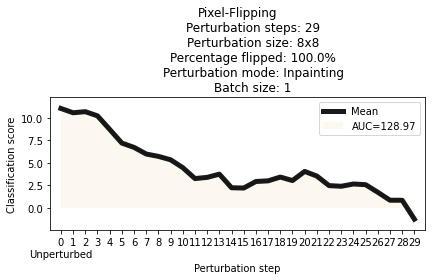

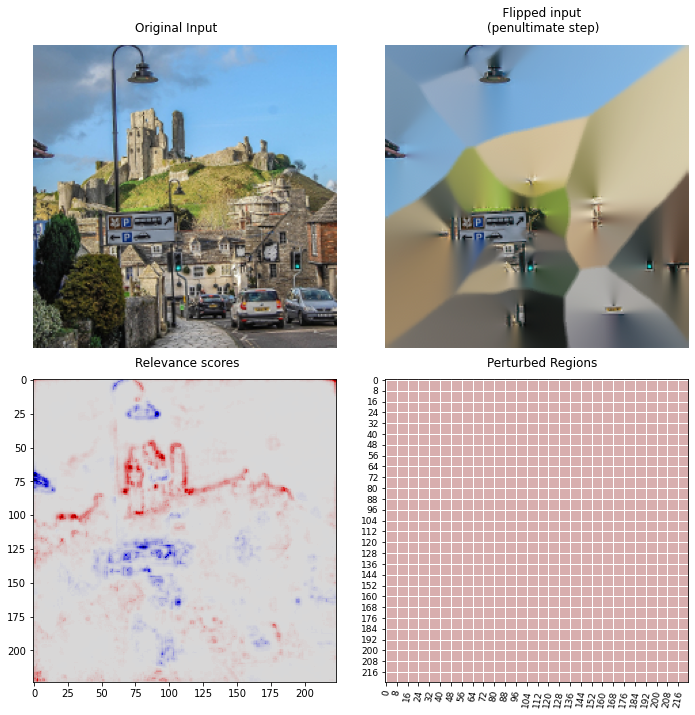

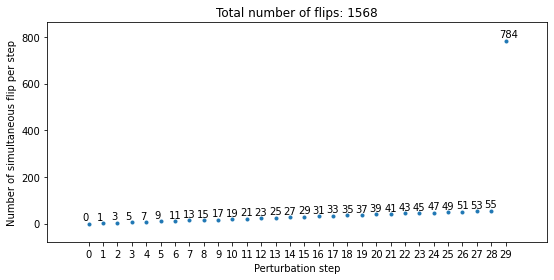

In [3]:
# %%script false --no-raise-error

from pf.core import PixelFlipping
from pf.objectives.constants import PixelFlippingObjectives
# Parameters for cell: input_nchw, relevance_scores_nchw, lrp_instance
from pf.perturbation_modes.constants import PerturbModes

perturbation_steps: int = 29
perturbation_size: int = 8

pixel_flipping_instance: PixelFlipping = PixelFlipping(perturbation_steps=perturbation_steps,
                                              perturbation_size=perturbation_size,
                                              perturb_mode=PerturbModes.INPAINTING,
                                              objective=PixelFlippingObjectives.MoRF)
input_nchw: torch.Tensor = X.clone().detach()

# Enable reproducibility
torch.manual_seed(42)

relevance_scores_nchw: torch.Tensor = R.clone().detach()

# Function should return the (single-class) classification score for the given input to measure the difference between flips.
forward_pass: Callable[[torch.Tensor], float] = lambda input_nchw: lrp_instance.model(input_nchw)[:,483]

# Run Pixel-Flipping algorithm
pixel_flipping_instance(input_nchw, relevance_scores_nchw, forward_pass)
pixel_flipping_instance.plot_class_prediction_scores()
pixel_flipping_instance.plot_image_comparison()
pixel_flipping_instance.plot_number_of_flips_per_step()

### Least Relevant First

Finished '_flip' in 0.1490 secs
Finished '_flip' in 0.1482 secs
Finished '_flip' in 0.1473 secs
Finished '_flip' in 0.1450 secs
Finished '_flip' in 0.1553 secs
Finished '_flip' in 0.1491 secs
Finished '_flip' in 0.1492 secs
Finished '_flip' in 0.1450 secs
Finished '_flip' in 0.1448 secs
Finished '_flip' in 0.1457 secs
Finished '_flip' in 0.1504 secs
Finished '_flip' in 0.1528 secs
Finished '_flip' in 0.1490 secs
Finished '_flip' in 0.1566 secs
Finished '_flip' in 0.1538 secs
Finished '_flip' in 0.1515 secs
Finished '_flip' in 0.1537 secs
Finished '_flip' in 0.1567 secs
Finished '_flip' in 0.1623 secs
Finished '_flip' in 0.1667 secs
Finished '_flip' in 0.1663 secs
Finished '_flip' in 0.1747 secs
Finished '_flip' in 0.1760 secs
Finished '_flip' in 0.1721 secs
Finished '_flip' in 0.1784 secs
Finished '_flip' in 0.1701 secs
Finished '_flip' in 0.1726 secs
Finished '_flip' in 0.1562 secs
Finished '_flip' in 0.1505 secs
Finished '__call__' in 4.6967 secs
Finished 'calculate_auc_score' in 0.0

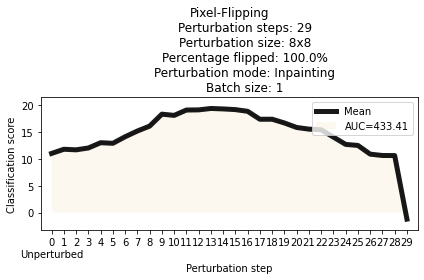

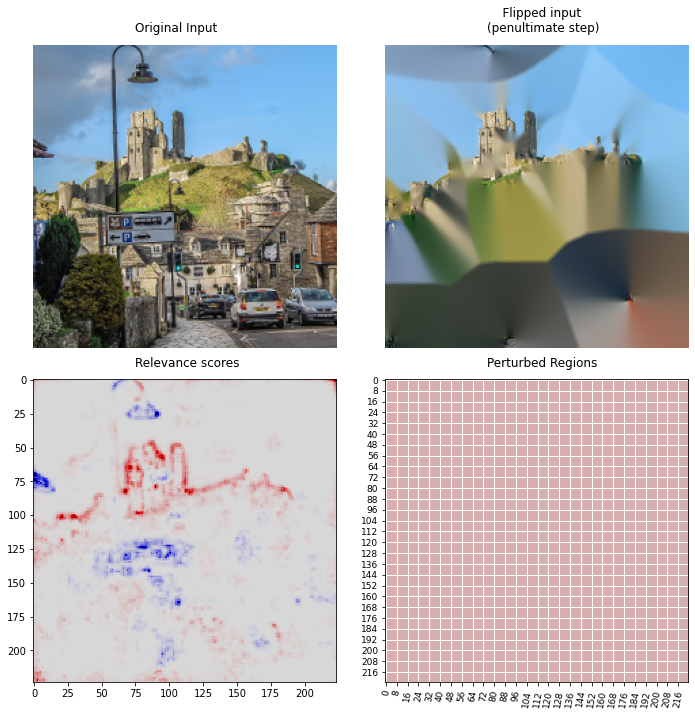

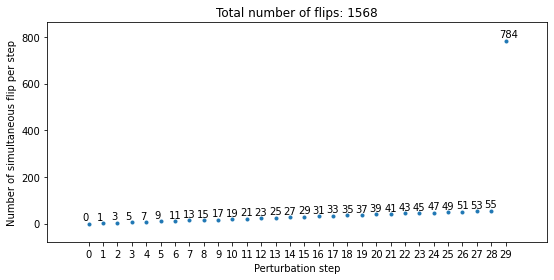

In [4]:
# %%script false --no-raise-error

from pf.core import PixelFlipping
from pf.objectives.constants import PixelFlippingObjectives
# Parameters for cell: input_nchw, relevance_scores_nchw, lrp_instance
from pf.perturbation_modes.constants import PerturbModes

perturbation_steps: int = 29
perturbation_size: int = 8

pixel_flipping_instance: PixelFlipping = PixelFlipping(perturbation_steps=perturbation_steps,
                                              perturbation_size=perturbation_size,
                                              perturb_mode=PerturbModes.INPAINTING,
                                              objective=PixelFlippingObjectives.LRF)
input_nchw: torch.Tensor = X.clone().detach()

# Enable reproducibility
torch.manual_seed(42)

relevance_scores_nchw: torch.Tensor = R.clone().detach()

# Function should return the (single-class) classification score for the given input to measure the difference between flips.
forward_pass: Callable[[torch.Tensor], float] = lambda input_nchw: lrp_instance.model(input_nchw)[:,483]

# Run Pixel-Flipping algorithm
pixel_flipping_instance(input_nchw, relevance_scores_nchw, forward_pass)
pixel_flipping_instance.plot_class_prediction_scores()
pixel_flipping_instance.plot_image_comparison()
pixel_flipping_instance.plot_number_of_flips_per_step()